# DATA 1030 Project - Fall 2024 @ Brown University

Task: Loan Approval Prediction (binary classification)

Link to Github Repository: https://github.com/CQY114/data1030_fall2024_final_project.git

Link to Kaggle: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

#### **IMPORTANT NOTE (DECEMBER 2024)**
**THE DATASET USED THROUGHOUT THIS PROJECT WAS ACCESSED OCTOBER 2024 WITH THIS ORIGINAL LINK: https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction. THE DATASET WAS UPDATED BY THE AUTHOR AFTERWARDS AND THE ORIGINAL LINK NOW POINTS TO AN EMPTY PAGE. ONE CAN LOOK UP FOR PART OF DESCRIPTIONS OF THE DATASET VIA THE NEW LINK, AND THE ACTUAL DATASET IS INCLUDED IN THE `data` FOLDER.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid

## Exploratory Data Analysis

In [2]:
# read data and display shape
df = pd.read_csv('../data/credit_risk_dataset.csv')
print(f"Raw DataFrame {df.shape}")
df.head(10)

Raw DataFrame (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [3]:
# inspect unreasonable data
df.loc[
    (df['person_age']>100) | (df['person_emp_length']>100)
][['person_age', 'person_emp_length']]

,person_age,person_emp_length
0,22,123.0
81,144,4.0
183,144,4.0
210,21,123.0
575,123,2.0
747,123,7.0
32297,144,12.0


In [4]:
# discard unreasonable data and display shape
df.drop(df.loc[
    (df['person_age']>100) | (df['person_emp_length']>100)
].index, inplace=True)
print(df.shape)

(32574, 12)


In [5]:
# Distribution of classes
Y = df['loan_status']
X = df.loc[:, df.columns != 'loan_status']
print(f"Size of class 1 samples: {Y.sum()}")
print(f"Proportion of class 1 samples: {Y.mean()}")

Size of class 1 samples: 7107
Proportion of class 1 samples: 0.21818014367286792


In [6]:
# split by classes and display shapes
df_class_0 = df[Y==0]
df_class_1 = df[Y==1]
print(f"Shape of class 0 data: {df_class_0.shape}")
print(f"Shape of class 1 data: {df_class_1.shape}")

Shape of class 0 data: (25467, 12)
Shape of class 1 data: (7107, 12)


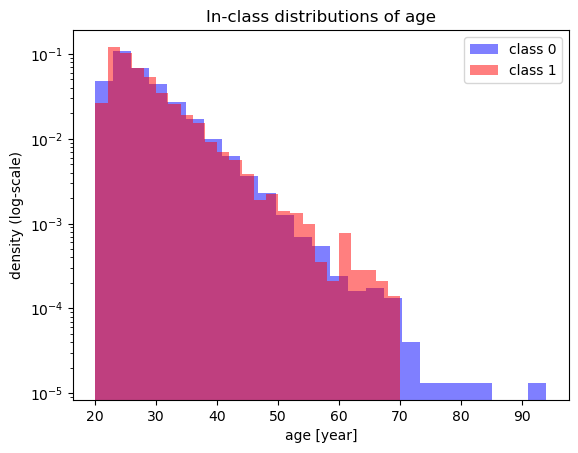

In [7]:
# in-class distributions of age
plt.hist(df_class_0['person_age'], bins=25, density=True, log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['person_age'], bins=25, density=True, log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of age')
plt.xlabel('age [year]')
plt.ylabel('density (log-scale)')
plt.legend()
plt.savefig('../figs/age_dist.png', dpi=300, transparent=True)
plt.show()

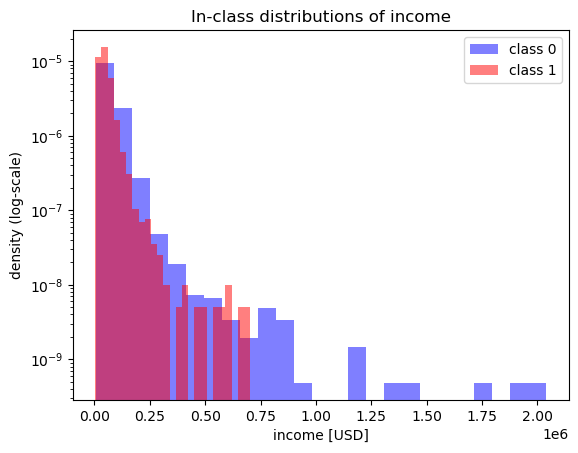

In [8]:
# in-class distributions of income
plt.hist(df_class_0['person_income'], bins=25, density=True, log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['person_income'], bins=25, density=True, log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of income')
plt.xlabel('income [USD]')
plt.ylabel('density (log-scale)')
plt.legend()
plt.savefig('../figs/income_dist.png', dpi=300, transparent=True)
plt.show()

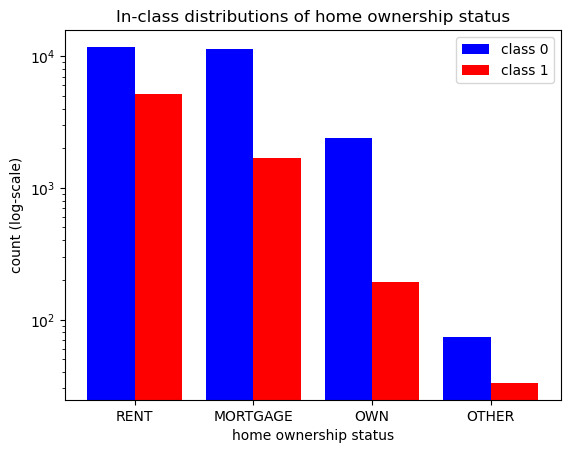

In [9]:
# in-class distributions of home ownership status
x = df['person_home_ownership'].value_counts().keys()
y0 = df_class_0['person_home_ownership'].value_counts().values
y1 = df_class_1['person_home_ownership'].value_counts().values
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y0, width=0.4, color='b', label='class 0', log=True)
plt.bar(x_axis+0.2, y1, width=0.4, color='r', label='class 1', log=True)
plt.xticks(x_axis, x)
plt.title('In-class distributions of home ownership status')
plt.xlabel('home ownership status')
plt.ylabel('count (log-scale)')
plt.legend()
plt.savefig('../figs/home_ownership_dist.png', dpi=300, transparent=True)
plt.show()

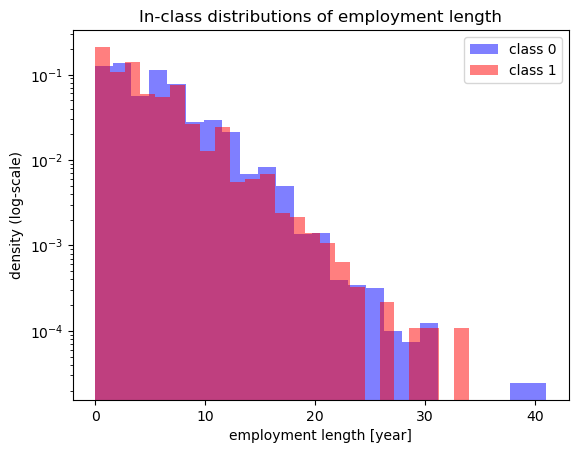

In [10]:
# in-class distributions of employment length
plt.hist(df_class_0['person_emp_length'], bins=25, density=True, log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['person_emp_length'], bins=25, density=True, log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of employment length')
plt.xlabel('employment length [year]')
plt.ylabel('density (log-scale)')
plt.legend()
plt.savefig('../figs/employment_length_dist.png', dpi=300, transparent=True)
plt.show()

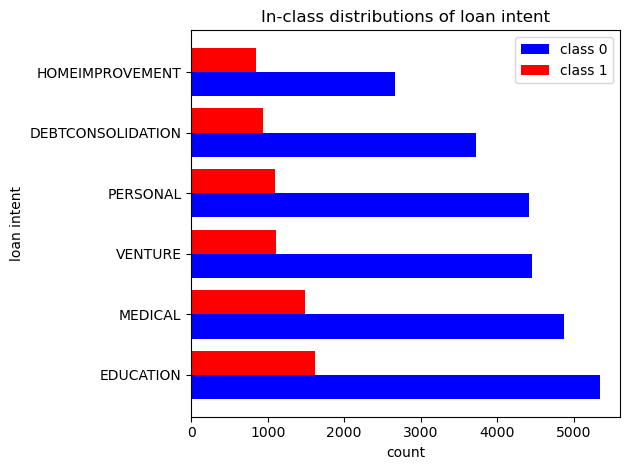

In [11]:
# in-class distributions of loan intent
y = df['loan_intent'].value_counts().keys()
x0 = df_class_0['loan_intent'].value_counts().values
x1 = df_class_1['loan_intent'].value_counts().values
y_axis = np.arange(len(y))
plt.barh(y_axis-0.2, x0, height=0.4, color='b', label='class 0')
plt.barh(y_axis+0.2, x1, height=0.4, color='r', label='class 1')
plt.yticks(y_axis, y)
plt.title('In-class distributions of loan intent')
plt.xlabel('count')
plt.ylabel('loan intent')
plt.legend()
plt.tight_layout()
plt.savefig('../figs/loan_intent_dist.png', dpi=300, transparent=True)
plt.show()

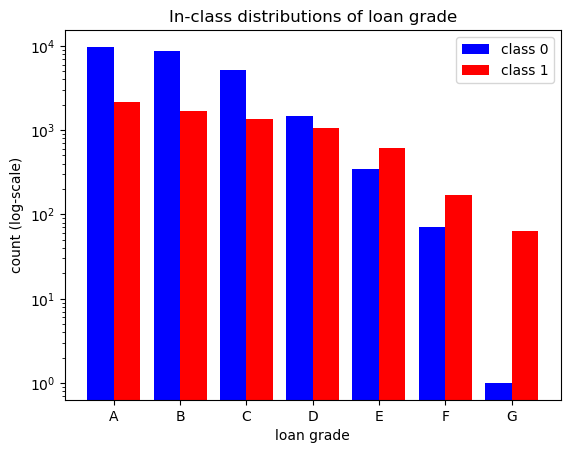

In [12]:
# in-class distributions of loan grade
x = df['loan_grade'].value_counts().keys()
y0 = df_class_0['loan_grade'].value_counts().values
y1 = df_class_1['loan_grade'].value_counts().values
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y0, width=0.4, color='b', label='class 0', log=True)
plt.bar(x_axis+0.2, y1, width=0.4, color='r', label='class 1', log=True)
plt.xticks(x_axis, x)
plt.title('In-class distributions of loan grade')
plt.xlabel('loan grade')
plt.ylabel('count (log-scale)')
plt.legend()
plt.savefig('../figs/loan_grade_dist.png', dpi=300, transparent=True)
plt.show()

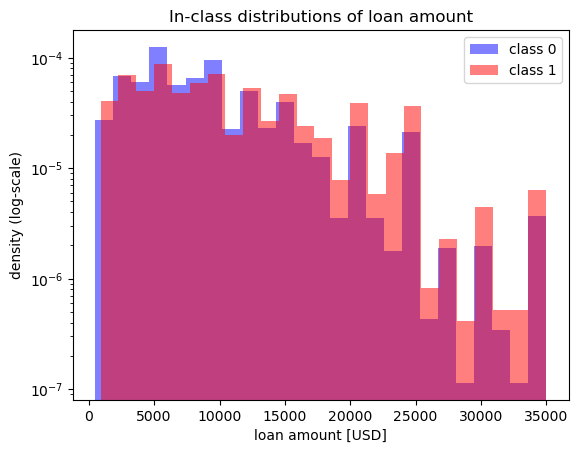

In [13]:
# in-class distributions of loan amount
plt.hist(df_class_0['loan_amnt'], bins=25, density=True, log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['loan_amnt'], bins=25, density=True, log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of loan amount')
plt.xlabel('loan amount [USD]')
plt.ylabel('density (log-scale)')
plt.legend()
plt.savefig('../figs/loan_amount_dist.png', dpi=300, transparent=True)
plt.show()

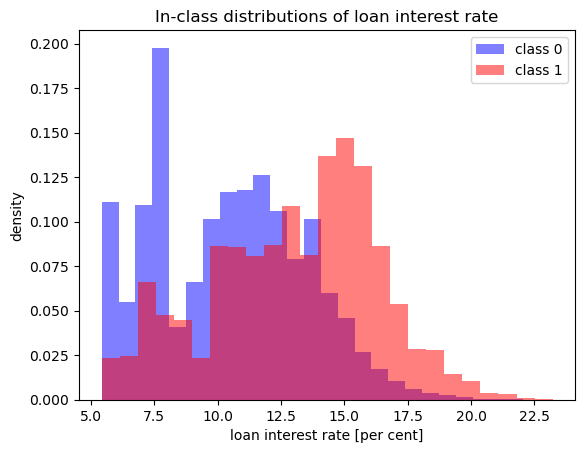

In [14]:
# in-class distributions of loan interest rate
plt.hist(df_class_0['loan_int_rate'], bins=25, density=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['loan_int_rate'], bins=25, density=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of loan interest rate')
plt.xlabel('loan interest rate [per cent]')
plt.ylabel('density')
plt.legend()
plt.savefig('../figs/loan_int_rate_dist.png', dpi=300, transparent=True)
plt.show()

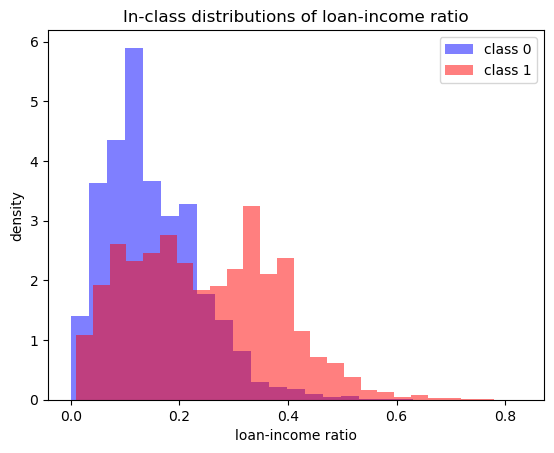

In [15]:
# in-class distributions of loan-income ratio
plt.hist(df_class_0['loan_percent_income'], bins=25, density=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['loan_percent_income'], bins=25, density=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of loan-income ratio')
plt.xlabel('loan-income ratio')
plt.ylabel('density')
plt.legend()
plt.savefig('../figs/loan_income_ratio.png', dpi=300, transparent=True)
plt.show()

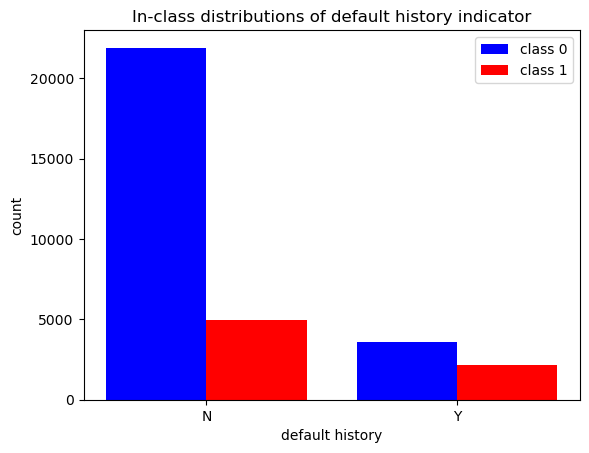

In [16]:
# in-class distributions of default history indicator
x = df['cb_person_default_on_file'].value_counts().keys()
y0 = df_class_0['cb_person_default_on_file'].value_counts().values
y1 = df_class_1['cb_person_default_on_file'].value_counts().values
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y0, width=0.4, color='b', label='class 0', log=False)
plt.bar(x_axis+0.2, y1, width=0.4, color='r', label='class 1', log=False)
plt.xticks(x_axis, x)
plt.title('In-class distributions of default history indicator')
plt.xlabel('default history')
plt.ylabel('count')
plt.legend()
plt.savefig('../figs/default_history_dist.png', dpi=300, transparent=True)
plt.show()

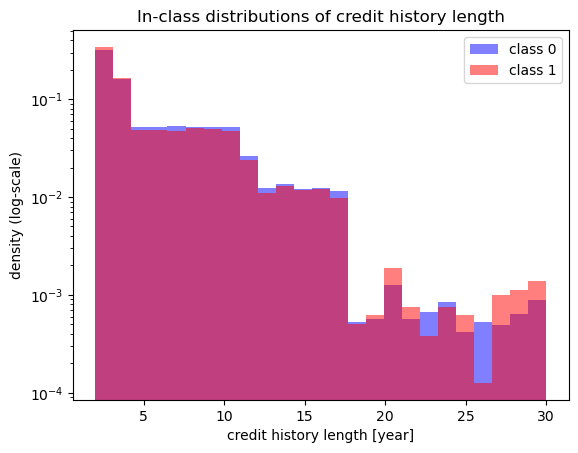

In [17]:
# in-class distributions of credit history length
plt.hist(df_class_0['cb_person_cred_hist_length'], bins=25, density=True, log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['cb_person_cred_hist_length'], bins=25, density=True, log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of credit history length')
plt.xlabel('credit history length [year]')
plt.ylabel('density (log-scale)')
plt.legend()
plt.savefig('../figs/credit_hist_length_dist.png', dpi=300, transparent=True)
plt.show()

In [18]:
# proportion of missing value
df_with_nan = df[df.isna().any(axis=1)]
size_nan = len(df_with_nan)
pct_nan = 100 * len(df_with_nan) / len(df)
print(f"Number of samples with missing values: {size_nan}")
print(f"Percentage of samples with missing values: {pct_nan:.2f}%")

Number of samples with missing values: 3942
Percentage of samples with missing values: 12.10%


In [19]:
# features with missing values
person_emp_length_with_nan = df[df['person_emp_length'].isna()]
person_emp_length_size_nan = len(person_emp_length_with_nan)
person_emp_length_pct_nan = 100 * person_emp_length_size_nan / len(df)
print(f"Number of missing values in feature 'person_emp_length': {person_emp_length_size_nan}")
print(f"Percentage of missing values in feature 'person_emp_length': {person_emp_length_pct_nan:.2f}%")
loan_int_rate_with_nan = df[df['loan_int_rate'].isna()]
loan_int_rate_size_nan = len(loan_int_rate_with_nan)
loan_int_rate_pct_nan = 100 * loan_int_rate_size_nan / len(df)
print(f"Number of missing values in feature 'loan_int_rate': {loan_int_rate_size_nan}")
print(f"Percentage of missing values in feature 'loan_int_rate': {loan_int_rate_pct_nan:.2f}%")

Number of missing values in feature 'person_emp_length': 895
Percentage of missing values in feature 'person_emp_length': 2.75%
Number of missing values in feature 'loan_int_rate': 3115
Percentage of missing values in feature 'loan_int_rate': 9.56%


In [20]:
nan_pattern = df[['person_emp_length', 'loan_int_rate']].isna()
nan_type, count = np.unique(nan_pattern, axis=0, return_counts=True)
print("Number and percentage of different missing value patterns:")
for i in range(len(count)):
    print(f"{nan_type[i]}: {count[i]}, {100 * count[i] / len(df) :.2f}%")

Number and percentage of different missing value patterns:
[False False]: 28632, 87.90%
[False  True]: 3047, 9.35%
[ True False]: 827, 2.54%
[ True  True]: 68, 0.21%


## Feature Engineering and Preprocessor

In [21]:
# discard rows
df = df.dropna(subset=['person_emp_length'])
# map feature
pd.set_option('future.no_silent_downcasting', True)
df.loc[:, 'cb_person_default_on_file'] = df['cb_person_default_on_file'].replace({'Y': 1, 'N': 0})
print(f"Shape of cleaned data: {df.shape}")
# global baseline accuracy
global_baseline_acc = (df['loan_status']==0).mean()
print(f"Global baseline accuracy: {global_baseline_acc}")

Shape of cleaned data: (31679, 12)
Global baseline accuracy: 0.7845575933583762


In [22]:
# preprocessor
standard_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]
onehot_features = [
    'person_home_ownership',
    'loan_intent',
]
binary_features = ['cb_person_default_on_file']
ordinal_features = ['loan_grade']
ordinal_categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
global_preprocessor = ColumnTransformer(transformers=[
    ('standard scaler', StandardScaler(), standard_features),
    ('one-hot encoder', OneHotEncoder(sparse_output=False), onehot_features),
    ('ordinal encoder', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
    ('identity', 'passthrough', binary_features),
])

## XGBoost

In [23]:
import xgboost as xgb

In [24]:
y = df['loan_status']
X = df.loc[:, df.columns != 'loan_status']
test_scores = []
for random_state in 42 * np.arange(5):
    print(f"Running with random_state={random_state}")
    # split
    X_train, X_other, y_train, y_other = train_test_split(
        X, y, test_size=0.2, random_state=random_state, shuffle=True, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(
        X_other, y_other, test_size=0.5, random_state=random_state, shuffle=True, stratify=y_other)
    print(f"Split sizes (train, val, test): {y_train.size}, {y_val.size}, {y_test.size}")
    # preprocess
    preprocessor = global_preprocessor
    X_train_prep = preprocessor.fit_transform(X_train)
    X_val_prep = preprocessor.transform(X_val)
    X_test_prep = preprocessor.transform(X_test)
    # run model
    XGB = xgb.XGBClassifier(
        early_stopping_rounds=50,
        random_state=42,
        missing=np.nan,
        colsample_bytree=0.9,
        subsample=0.8,
        n_jobs=-1,
    )
    params = {
        'max_depth': [2, 5, 10],
        'reg_alpha': [0.1, 0.5, 1],
        'reg_lambda': [0.1, 0.5, 1],
    }
    best_score = -np.inf
    best_params = None
    for param_set in ParameterGrid(params):
        XGB.set_params(**param_set)
        XGB.fit(X_train_prep, y_train, eval_set=[(X_val_prep, y_val)], verbose=False)
        score = XGB.score(X_val_prep, y_val)
        if score > best_score:
            best_score = score
            best_params = param_set
    print(f"Best parameter set: {best_params}")
    print(f"Best validation accuracy: {best_score}")
    best_booster = XGB.set_params(**best_params)
    best_booster.fit(X_train_prep, y_train, eval_set=[(X_val_prep, y_val)], verbose=False)
    y_test_pred = best_booster.predict(X_test_prep)
    test_score = (y_test_pred==y_test).mean()
    print(f"Test accuracy with best model: {test_score}")
    test_scores.append(test_score)
    print()
xgb_mean = np.mean(test_scores)
xgb_std = np.std(test_scores)
print(f"Mean of test accuracies: {xgb_mean}")
print(f"Standard deviation of test accuracies: {xgb_std}")

Running with random_state=0
Split sizes (train, val, test): 25343, 3168, 3168
Best parameter set: {'max_depth': 5, 'reg_alpha': 0.1, 'reg_lambda': 0.5}
Best validation accuracy: 0.9330808080808081
Test accuracy with best model: 0.9346590909090909

Running with random_state=42
Split sizes (train, val, test): 25343, 3168, 3168
Best parameter set: {'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 1}
Best validation accuracy: 0.9419191919191919
Test accuracy with best model: 0.9362373737373737

Running with random_state=84
Split sizes (train, val, test): 25343, 3168, 3168
Best parameter set: {'max_depth': 5, 'reg_alpha': 0.5, 'reg_lambda': 1}
Best validation accuracy: 0.9375
Test accuracy with best model: 0.9362373737373737

Running with random_state=126
Split sizes (train, val, test): 25343, 3168, 3168
Best parameter set: {'max_depth': 5, 'reg_alpha': 1, 'reg_lambda': 0.1}
Best validation accuracy: 0.9365530303030303
Test accuracy with best model: 0.9359217171717171

Running with random_s

`max_depth=5`, `reg_alpha=0.5`, `reg_lambda=1`

## Other Models with Feature Reductions

In [25]:
# helpers
def separate(df: pd.DataFrame):
    y = df['loan_status']
    X = df.loc[:, df.columns != 'loan_status']
    return X, y

def split(X, y, val_test_size, random_state):
    X_train, X_other, y_train, y_other = train_test_split(
        X, y, test_size=val_test_size, random_state=random_state, shuffle=True, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(
        X_other, y_other, test_size=0.5, random_state=random_state, shuffle=True, stratify=y_other)
    print(f"Split sizes (train, val, test): {y_train.size}, {y_val.size}, {y_test.size}")
    return X_train, X_val, X_test, y_train, y_val, y_test

def preprocess(preprocessor, X_train, X_val, X_test):
    X_train_prep = preprocessor.fit_transform(X_train)
    X_val_prep = preprocessor.transform(X_val)
    X_test_prep = preprocessor.transform(X_test)
    return X_train_prep, X_val_prep, X_test_prep

In [26]:
# form groups
groups = {"no missing": {}, "missing": {}}

# modify DataFrame
df_no_missing = df[df['loan_int_rate'].notna()]
X_no_missing, y_no_missing = separate(df_no_missing)
groups['no missing']['X'] = X_no_missing
groups['no missing']['y'] = y_no_missing
df_missing = df[df['loan_int_rate'].isna()].dropna(how='all', axis=1)
X_missing, y_missing = separate(df_missing)
groups['missing']['X'] = X_missing
groups['missing']['y'] = y_missing

# modify preprocessor
std_ftrs_missing = [ftr for ftr in standard_features if ftr != 'loan_int_rate']
pp_missing = ColumnTransformer(transformers=[
    ('standard scaler', StandardScaler(), std_ftrs_missing),
    ('one-hot encoder', OneHotEncoder(sparse_output=False), onehot_features),
    ('ordinal encoder', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
    ('identity', 'passthrough', binary_features)
])
groups['no missing']['preprocessor'] = global_preprocessor
groups['missing']['preprocessor'] = pp_missing

# split and preprocess
rs_idx = np.arange(5)
datasets = []
for idx in rs_idx:
    print(f"Iteration {idx+1}/{len(rs_idx)}")
    random_state = 42 * idx
    dataset = {}
    for description, group in groups.items():
        print(f"Handling group '{description}'")
        X = group['X']
        y = group['y']
        preprocessor = group['preprocessor']
        val_test_size = 0.4 if description == 'missing' else 0.2
        X_train, X_val, X_test, y_train, y_val, y_test = split(
            X, y, val_test_size=val_test_size, random_state=random_state)
        X_train_prep, X_val_prep, X_test_prep = preprocess(
            preprocessor, X_train, X_val, X_test)
        data = {
            'X_train': X_train_prep,
            'y_train': y_train,
            'X_val': X_val_prep,
            'y_val': y_val,
            'X_test': X_test_prep,
            'y_test': y_test,
        }
        dataset[description] = data
    datasets.append(dataset)

Iteration 1/5
Handling group 'no missing'
Split sizes (train, val, test): 22905, 2863, 2864
Handling group 'missing'
Split sizes (train, val, test): 1828, 609, 610
Iteration 2/5
Handling group 'no missing'
Split sizes (train, val, test): 22905, 2863, 2864
Handling group 'missing'
Split sizes (train, val, test): 1828, 609, 610
Iteration 3/5
Handling group 'no missing'
Split sizes (train, val, test): 22905, 2863, 2864
Handling group 'missing'
Split sizes (train, val, test): 1828, 609, 610
Iteration 4/5
Handling group 'no missing'
Split sizes (train, val, test): 22905, 2863, 2864
Handling group 'missing'
Split sizes (train, val, test): 1828, 609, 610
Iteration 5/5
Handling group 'no missing'
Split sizes (train, val, test): 22905, 2863, 2864
Handling group 'missing'
Split sizes (train, val, test): 1828, 609, 610


In [27]:
def tune(model, param_grid, datasets):
    test_scores = []
    for i, dataset in enumerate(datasets):
        print(f"Running iteration {i+1}/{len(datasets)}")
        print()
        test_correct_count = 0
        test_size = 0
        for description, data in dataset.items():
            print(f"Group of {description}:")
            X_train = data['X_train']
            y_train = data['y_train']
            X_val = data['X_val']
            y_val = data['y_val']
            X_test = data['X_test']
            y_test = data['y_test']
            best_score = -np.inf
            best_params = None
            for param_set in ParameterGrid(param_grid):
                model.set_params(**param_set)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)
                score = (y_pred==y_val).mean()
                if score > best_score:
                    best_score = score
                    best_params = param_set
            print(f"Best parameter set: {best_params}")
            print(f"Best validation accuracy: {best_score}")
            model.set_params(**best_params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            test_correct_count += (y_pred==y_test).sum()
            test_size += y_test.size
        test_score = test_correct_count / test_size
        print(f"Test accuracy with best model combination: {test_score}")
        print()
        test_scores.append(test_score)
    mean = np.mean(test_scores)
    std = np.std(test_scores)
    print(f"Mean of test accuracies: {mean}")
    print(f"Standard deviation of test accuracies: {std}")
    return mean, std

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_regressor = LogisticRegression(
    penalty='elasticnet',
    random_state=42,
    solver='saga',
    max_iter=5000,
    n_jobs=-1,
)
log_reg_param_grid = {
    'C': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
}
log_reg_mean, log_reg_std = tune(logistic_regressor, log_reg_param_grid, datasets)

Running iteration 1/5

Group of no missing:
Best parameter set: {'C': 0.1, 'l1_ratio': 0.5}
Best validation accuracy: 0.854697869367796
Group of missing:
Best parameter set: {'C': 10, 'l1_ratio': 0.1}
Best validation accuracy: 0.8719211822660099
Test accuracy with best model combination: 0.8503166378814048

Running iteration 2/5

Group of no missing:
Best parameter set: {'C': 1, 'l1_ratio': 0.1}
Best validation accuracy: 0.8487600419140762
Group of missing:
Best parameter set: {'C': 1, 'l1_ratio': 0.1}
Best validation accuracy: 0.8637110016420362
Test accuracy with best model combination: 0.8506044905008635

Running iteration 3/5

Group of no missing:
Best parameter set: {'C': 0.1, 'l1_ratio': 0.1}
Best validation accuracy: 0.8442193503318197
Group of missing:
Best parameter set: {'C': 0.1, 'l1_ratio': 0.5}
Best validation accuracy: 0.8571428571428571
Test accuracy with best model combination: 0.8575129533678757

Running iteration 4/5

Group of no missing:
Best parameter set: {'C': 0.1

no missing: `C=0.1`, `l1_ratio=0.1`

missing: `C=10`, `l1_ratio=0.1`

### Support Vector Machine

In [30]:
from sklearn.svm import SVC

In [31]:
svc = SVC(kernel='rbf')
svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
}
svc_mean, svc_std = tune(svc, svc_param_grid, datasets)

Running iteration 1/5

Group of no missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best validation accuracy: 0.9259517988124345
Group of missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best validation accuracy: 0.9146141215106732
Test accuracy with best model combination: 0.9139320667818077

Running iteration 2/5

Group of no missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best validation accuracy: 0.9207125392944464
Group of missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best validation accuracy: 0.896551724137931
Test accuracy with best model combination: 0.9214162348877375

Running iteration 3/5

Group of no missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best validation accuracy: 0.9116311561299336
Group of missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best validation accuracy: 0.8883415435139573
Test accuracy with best model combination: 0.9176741508347726

Running iteration 4/5

Group of no missing:
Best parameter set: {'C': 10, 'gamma': 0.1}
Best

`C=10`, `gamma=0.1`

### K-Nearest-Neighbor Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_jobs=-1)
knn_param_grid = {'n_neighbors': [5, 10, 20]}
knn_mean, knn_std = tune(knn, knn_param_grid, datasets)

Running iteration 1/5

Group of no missing:
Best parameter set: {'n_neighbors': 10}
Best validation accuracy: 0.9001047851903597
Group of missing:
Best parameter set: {'n_neighbors': 5}
Best validation accuracy: 0.8817733990147784
Test accuracy with best model combination: 0.8909038572251008

Running iteration 2/5

Group of no missing:
Best parameter set: {'n_neighbors': 10}
Best validation accuracy: 0.9025497729654209
Group of missing:
Best parameter set: {'n_neighbors': 5}
Best validation accuracy: 0.8719211822660099
Test accuracy with best model combination: 0.8960852043753598

Running iteration 3/5

Group of no missing:
Best parameter set: {'n_neighbors': 10}
Best validation accuracy: 0.8962626615438352
Group of missing:
Best parameter set: {'n_neighbors': 5}
Best validation accuracy: 0.8784893267651889
Test accuracy with best model combination: 0.8932066781807715

Running iteration 4/5

Group of no missing:
Best parameter set: {'n_neighbors': 20}
Best validation accuracy: 0.896961

no missing: `n_neighbors=10`

missing: `n_neighbors=5`

## Summary of Performances

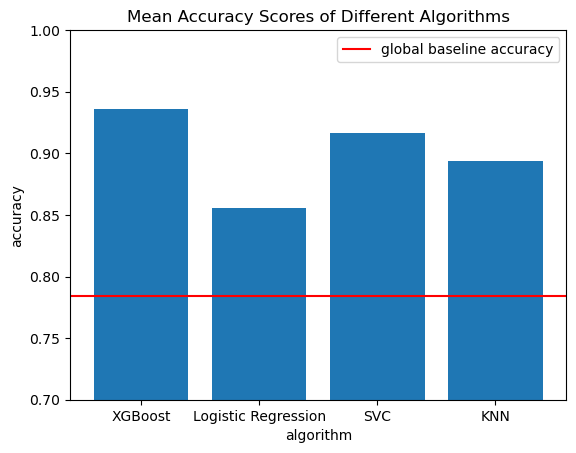

In [34]:
plt.bar(np.arange(4), [xgb_mean, log_reg_mean, svc_mean, knn_mean])
plt.plot(np.linspace(-0.6, 3.6, 2), 2*[global_baseline_acc], c='r', label='global baseline accuracy')
plt.xticks(np.arange(4), ['XGBoost', 'Logistic Regression', 'SVC', 'KNN'])
plt.xlim(-0.6, 3.6)
plt.ylim(0.7, 1.0)
plt.title("Mean Accuracy Scores of Different Algorithms")
plt.xlabel("algorithm")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('../figs/mean_acc_bar.png', dpi=300, transparent=True)
plt.show()

PS: std all below 0.005

## Feature Importance - XGBoost

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, fbeta_score
from sklearn.inspection import permutation_importance
import shap

### Final Training and Inspections

In [36]:
y = df['loan_status']
X = df.loc[:, df.columns != 'loan_status']
RANDOM_STATE = 42
X_train, X_other, y_train, y_other = train_test_split(
    X, y, test_size=0.1, random_state=RANDOM_STATE, shuffle=True, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(
    X_other, y_other, test_size=0.5, random_state=RANDOM_STATE, shuffle=True, stratify=y_other)
preprocessor = global_preprocessor
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)
XGB = xgb.XGBClassifier(
    max_depth=5,
    reg_alpha=0.5,
    reg_lambda=1,
    early_stopping_rounds=50,
    random_state=RANDOM_STATE,
    missing=np.nan,
    colsample_bytree=0.9,
    subsample=0.8,
    importance_type='total_gain',
    n_jobs=-1,
)
XGB.fit(X_train_prep, y_train, eval_set=[(X_val_prep, y_val)], verbose=False)
y_pred = XGB.predict(X_test_prep)
acc = XGB.score(X_test_prep, y_test)
f1 = f1_score(y_test, y_pred)
fpt4 = fbeta_score(y_test, y_pred, beta=0.4)

In [37]:
# baseline accuracy
y_baseline_acc = np.zeros_like(y_test)
acc_baseline = (y_baseline_acc==y_test).mean()
print(f"Baseline accuracy: {acc_baseline}")
print(f"Model accuracy: {acc}")

Baseline accuracy: 0.7847222222222222
Model accuracy: 0.9381313131313131


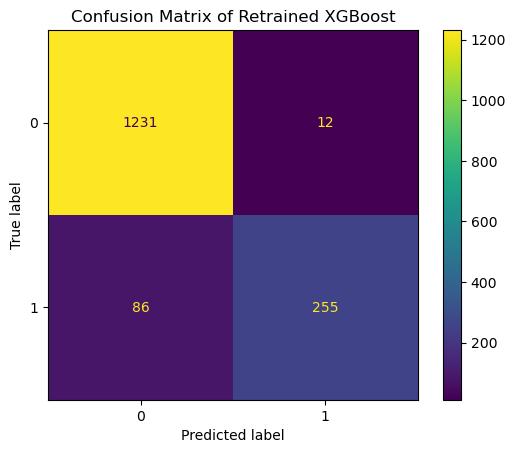

In [38]:
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()
plt.title("Confusion Matrix of Retrained XGBoost")
plt.savefig('../figs/confusion_matrix.png', dpi=300, transparent=True)
plt.show()

In [39]:
# baseline f1
y_baseline_f1 = np.ones_like(y_test)
f1_baseline = f1_score(y_test, y_baseline_f1)
print(f"Baseline f1 score: {f1_baseline}")
print(f"Model f1 score: {f1}")

Baseline f1 score: 0.35428571428571426
Model f1 score: 0.8388157894736842


In [40]:
# baseline f-0.4
y_baseline_fbeta = np.ones_like(y_test)
fpt4_baseline = fbeta_score(y_test, y_baseline_fbeta, beta=0.4)
print(f"Baseline f1 score: {fpt4_baseline}")
print(f"Model f-0.4 score: {fpt4}")

Baseline f1 score: 0.2414070891514501
Model f-0.4 score: 0.9198905336484637


### Feature Importance

In [41]:
feature_names = preprocessor.get_feature_names_out()

In [42]:
# permutation importance
perm_imp_result = permutation_importance(XGB, X_test_prep, y_test, n_jobs=-1, random_state=42)
perm_imp_mean = perm_imp_result.importances_mean
sorted_indices = np.argsort(-perm_imp_mean)
sorted_feature_names = feature_names[sorted_indices]
sorted_perm_imp_mean = perm_imp_mean[sorted_indices]
print("Top 3 most important features:")
for i in range(3):
    print(f"{sorted_feature_names[i]}: {sorted_perm_imp_mean[i]}")

Top 3 most important features:
ordinal encoder__loan_grade: 0.08939393939393943
standard scaler__loan_percent_income: 0.08876262626262629
standard scaler__person_income: 0.04797979797979801


In [43]:
# total gain importance
total_gain_imp = XGB.feature_importances_
sorted_indices = np.argsort(-total_gain_imp)
sorted_feature_names = feature_names[sorted_indices]
sorted_total_gain_imp = total_gain_imp[sorted_indices]
print("Top 3 most imporant features:")
for i in range(3):
    print(f"{sorted_feature_names[i]}: {sorted_total_gain_imp[i]}")

Top 3 most imporant features:
standard scaler__loan_percent_income: 0.22136981785297394
ordinal encoder__loan_grade: 0.21810074150562286
standard scaler__person_income: 0.16371871531009674


In [44]:
# shap value
explainer = shap.TreeExplainer(XGB)
shap_values = explainer(X_test_prep)
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
sorted_indices = np.argsort(-mean_abs_shap_values)
sorted_feature_names = feature_names[sorted_indices]
sorted_mean_abs_shap_values = mean_abs_shap_values[sorted_indices]
print("Top 3 most important features:")
for i in range(3):
    print(f"{sorted_feature_names[i]}: {sorted_mean_abs_shap_values[i]}")

Top 3 most important features:
ordinal encoder__loan_grade: 0.9583383202552795
standard scaler__person_income: 0.940824568271637
standard scaler__loan_percent_income: 0.7857822179794312


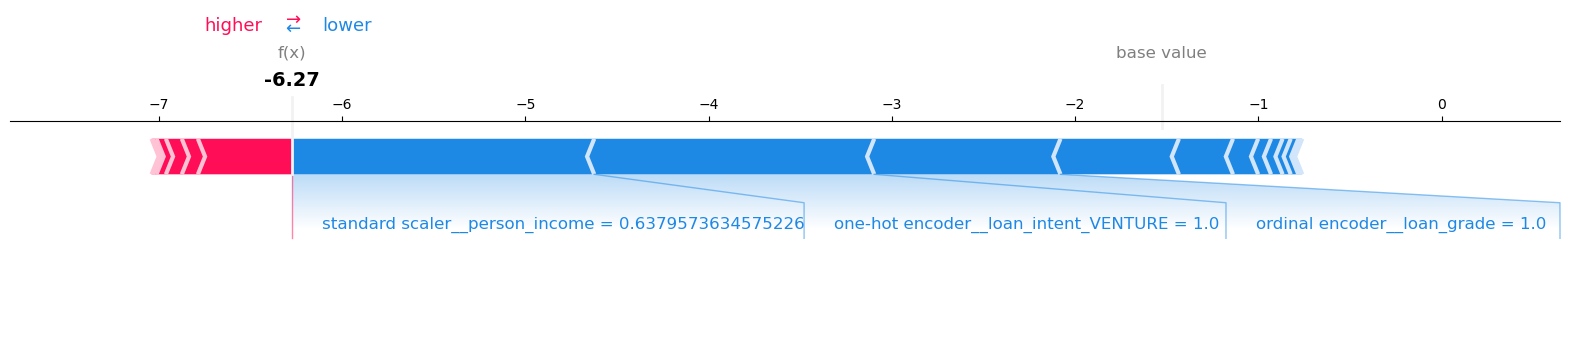

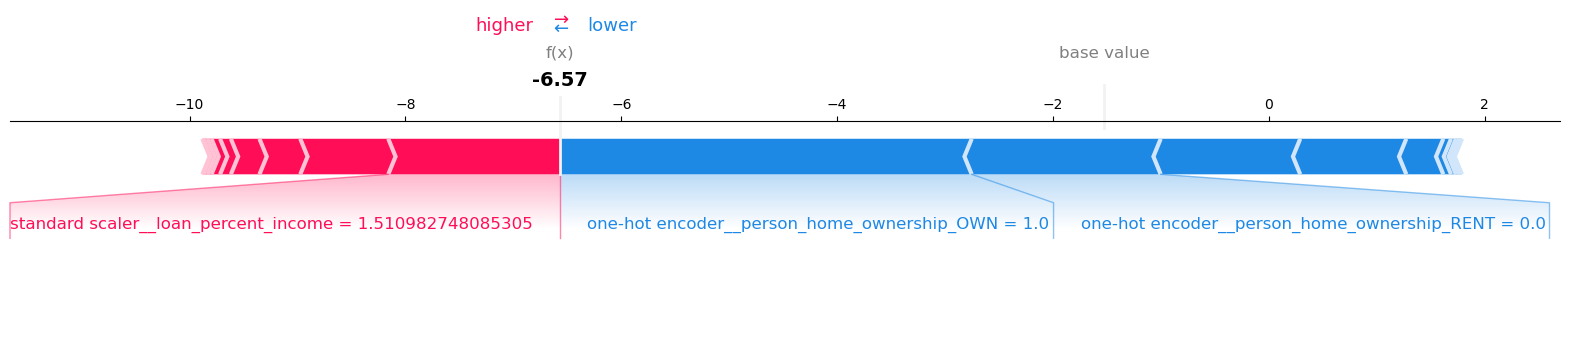

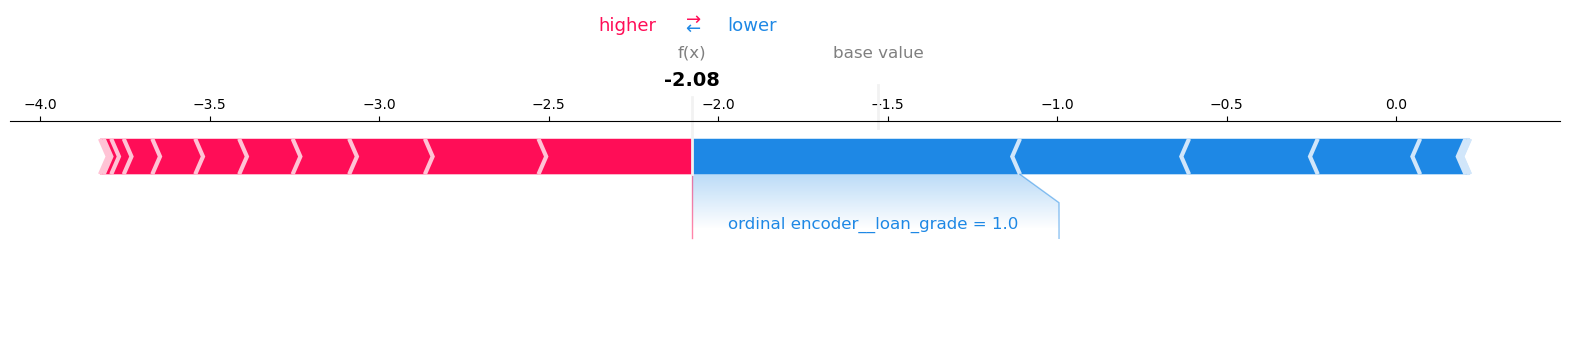

In [45]:
# local shap
sample_indices = [42, 250, 1437]
for index in sample_indices:
    shap.plots.force(
        base_value=shap_values.base_values[index],
        shap_values=shap_values.values[index],
        features=X_test_prep[index],
        feature_names=feature_names,
        matplotlib=True,
        show=False,
        contribution_threshold=0.22,
    )
    plt.savefig(f'../figs/force_plot_sample_{index}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()